# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y), 1)

## Splitting the dataset

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the model

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Testing the model with the learn dataset

In [5]:
y_train_pred = regressor.predict(X_train)

## Printing the metrics for the learn dataset

In [6]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)

# The idea for how to calculate the R2 adjusted was taken form:
# https://stackoverflow.com/questions/49381661/how-do-i-calculate-the-adjusted-r-squared-score-using-scikit-learn
numModelFeat = len(regressor.coef_[0]) # Number of features, used in the model - n

numTrainObj = len(X_train) # Number of obervations in the learn dataset - p

r2_adj_train = 1 - (1 - r2_train) * (numTrainObj - 1) / (numTrainObj - numModelFeat - 1)

print(f'R2_train = {r2_train}')
print(f'R2_adj_train = {r2_adj_train}')

R2_train = 0.9277253998587902
R2_adj_train = 0.9276876042775947


## Visualise Experimental vs Predicted values for the test dataset

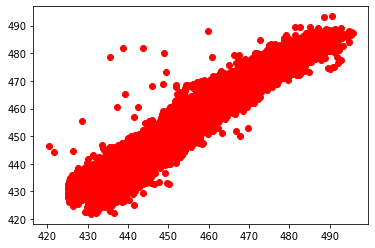

In [7]:
plt.scatter(y_train, y_train_pred, color = 'red')
# plt.plot(y_test, y_train_pred, color = 'blue')
plt.show()

## Testing the model with the test dataset

In [8]:
y_test_pred = regressor.predict(X_test)
print(y_test_pred)

[[431.42761597]
 [458.56124622]
 [462.75264705]
 ...
 [469.51835895]
 [442.41759454]
 [461.88279939]]


## Print the metrics for the test dataset

In [9]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)

# numModelFeat is calculate above
numTestObs = len(X_test) # Number of obervations in the test dataset - p
r2_adj_test = 1 - (1 - r2_test) * ((numTestObs - 1)/(numTestObs - numModelFeat - 1))

print(f'R2_test = {r2_test}')
print(f'R2_adj_test = {r2_adj_test}')

R2_test = 0.9325315554761303
R2_adj_test = 0.9323901862890714


## Visualise Experimental vs Predicted values for the test dataset

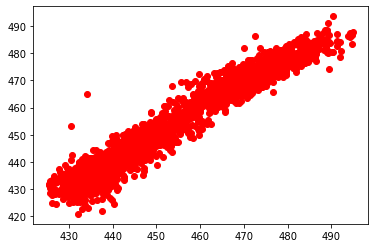

In [10]:
plt.scatter(y_test, y_test_pred, color = 'red')
# plt.plot(y_test, y_test_pred, color = 'blue')
plt.show()